In [1]:
import arviz as az
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import scipy.stats

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
%config InlineBackend.figure_format = 'retina'

In [3]:
RANDOM_SEED = 1066
rng = np.random.default_rng(RANDOM_SEED)
mpl.rcParams['figure.constrained_layout.use'] = True

This is 2023 homework 1 from https://github.com/rmcelreath/stat_rethinking_2023/blob/main/homework/week01.pdf

for now

## Problem 1

In [4]:
N, W = 15, 4

In [5]:
grid = np.linspace(0, 1, 100)

In [6]:
prior = np.ones(shape=grid.shape)

In [7]:
prior = prior / prior.sum()

In [8]:
posterior = scipy.stats.binom.pmf(W, N, grid)

In [9]:
posterior = prior * posterior

In [10]:
posterior = posterior / posterior.sum()

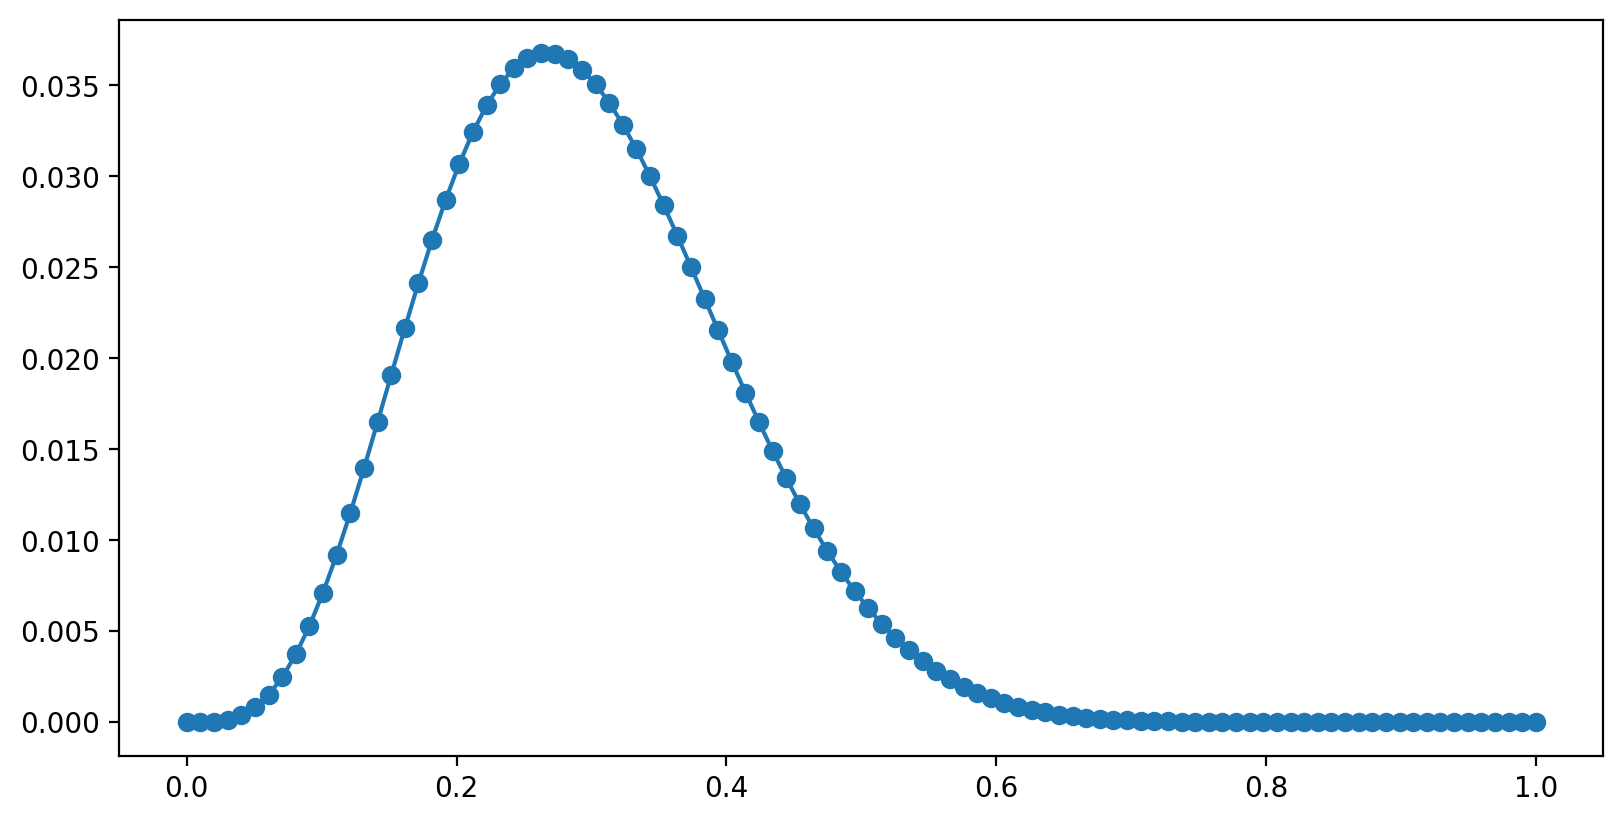

In [11]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(grid, posterior, 'o-')

## Problem 2

In [12]:
samples = np.random.choice(grid, size=int(1e4), replace=True, p=posterior)

In [13]:
post_predictive = scipy.stats.binom.rvs(n=5, p=samples)

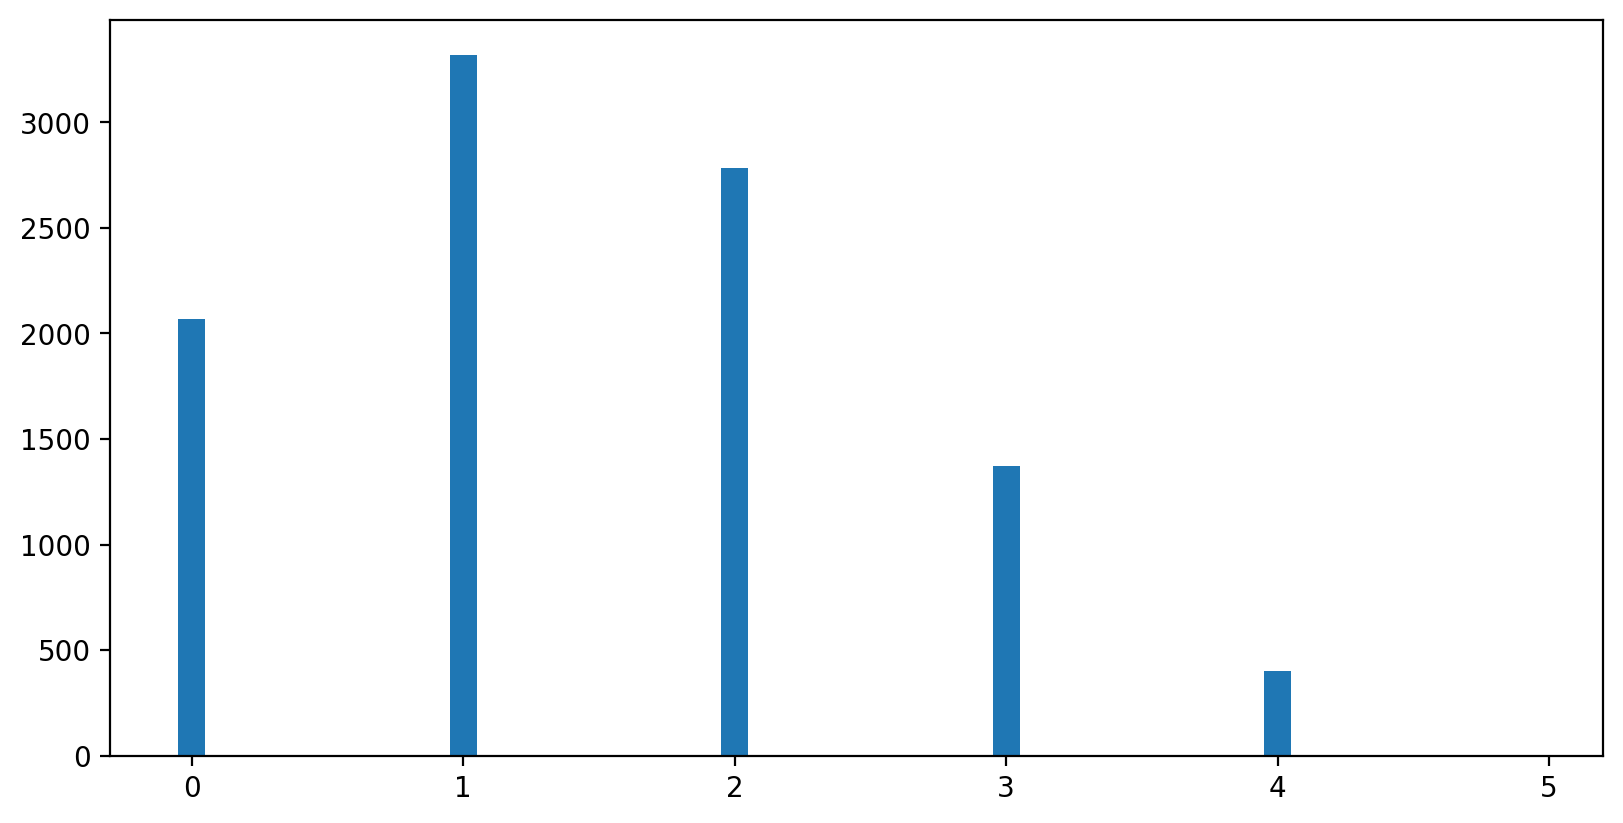

In [14]:
fig, ax = plt.subplots(figsize=(8, 4))
bar_width = 0.1
plt.hist(post_predictive, bins=np.arange(0, 6) - bar_width / 2, width=bar_width);

## Problem 3

In [15]:
(post_predictive >= 3).sum() / post_predictive.size

0.183